Yilei Dong | ID: 1466802171 | DSCI 352

Classifying if patients have breast cancer with logistic regression & Gaussian Naive Bayes algorithms. 

##### 1) (a) Download the WDBC data from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). 

Breast mass of patients classified as either benign or malignant. 

In [424]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score, roc_curve 
import statsmodels.api as sm 
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Read in dataset
df = pd.read_csv("wdbc.data", header=None, engine='python')
df.shape

(569, 32)

In [425]:
# Name data columns 
df.columns = ['patientID', 'diagnosis', 'mean.radius', 'mean.texture', 'mean.perimeter', 'mean.area', 'mean.smoothness', 
              'mean.compactness', 'mean.concavity', 'mean.concavepoints', 'mean.symmetry', 'mean.fractaldimension', 
              'SE.radius', 'SE.texture', 'SE.perimeter', 'SE.area', 'SE.smoothness', 
              'SE.compactness', 'SE.concavity', 'SE.concavepoints', 'SE.symmetry', 'SE.fractaldimension', 
              'worst.radius', 'worst.texture', 'worst.perimeter', 'worst.area', 'worst.smoothness', 
              'worst.compactness', 'worst.concavity', 'worst.concavepoints', 'worst.symmetry', 'worst.fractaldimension']

In [426]:
# Assign binary class labels & display part of dataframe 
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0
df.head()

patientID  diagnosis  mean.radius  mean.texture  mean.perimeter  mean.area  \
0     842302          1        17.99         10.38          122.80     1001.0   
1     842517          1        20.57         17.77          132.90     1326.0   
2   84300903          1        19.69         21.25          130.00     1203.0   
3   84348301          1        11.42         20.38           77.58      386.1   
4   84358402          1        20.29         14.34          135.10     1297.0   

   mean.smoothness  mean.compactness  mean.concavity  mean.concavepoints  ...  \
0          0.11840           0.27760          0.3001             0.14710  ...   
1          0.08474           0.07864          0.0869             0.07017  ...   
2          0.10960           0.15990          0.1974             0.12790  ...   
3          0.14250           0.28390          0.2414             0.10520  ...   
4          0.10030           0.13280          0.1980             0.10430  ...   

   worst.radius  worst.texture  worst.perimeter  worst.area  worst.smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst.compactness  worst.concavity  worst.concavepoints  worst.symmetry  \
0             0.6656           0.7119               0.2654          0.4601   
1             0.1866           0.2416               0.1860          0.2750   
2             0.4245           0.4504               0.2430          0.3613   
3             0.8663           0.6869               0.2575          0.6638   
4             0.2050           0.4000               0.1625          0.2364   

   worst.fractaldimension  
0                 0.11890  
1                 0.08902  
2                 0.08758  
3                 0.17300  
4                 0.07678  

[5 rows x 32 columns]

##### (b) Choose the first 30 malignant cases and the first 50 benign cases in the data set as the test set and the rest as the training set. 

In [427]:
# Create x test for both malignment & benign
# Create x test for malignant 
malign = df.loc[df['diagnosis'] == 1]
malignTestX = malign[:30].drop(['patientID', 'diagnosis'], axis=1) 
# Create x train for malignant
malignTrainX = malign[30:].drop(['patientID', 'diagnosis'] , axis=1)
# Create x test for benign
benign = df.loc[df['diagnosis'] == 0]
benignTestX = benign[:50].drop(['patientID', 'diagnosis'], axis=1)
# Create x train for benign
benignTrainX = benign[50:].drop(['patientID', 'diagnosis'], axis=1)

# Create y test for malignant
malignDiag = malign['diagnosis']
malignTestY = malignDiag[:30]
# Create y train for malignant
malignTrainY = malignDiag[30:]
# Create y test for benign
benignDiag = benign['diagnosis']
benignTestY = benignDiag[:50]
# Create y train for benign
benignTrainY = benignDiag[50:]

# Concatenate 
x_training = [malignTrainX, benignTrainX]
x_train = pd.concat(x_training)
y_training = [malignTrainY, benignTrainY]
y_train = pd.concat(y_training)
x_testing = [malignTestX, benignTestX]
x_test = pd.concat(x_testing)
y_testing = [malignTestY, benignTestY]
y_test = pd.concat(y_testing)

##### (c) Binary Classification Using Logistic Regression 
i. Depict scatter plots of the features in your training set in a scatter matrix. 

C:\Users\yilei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\yilei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


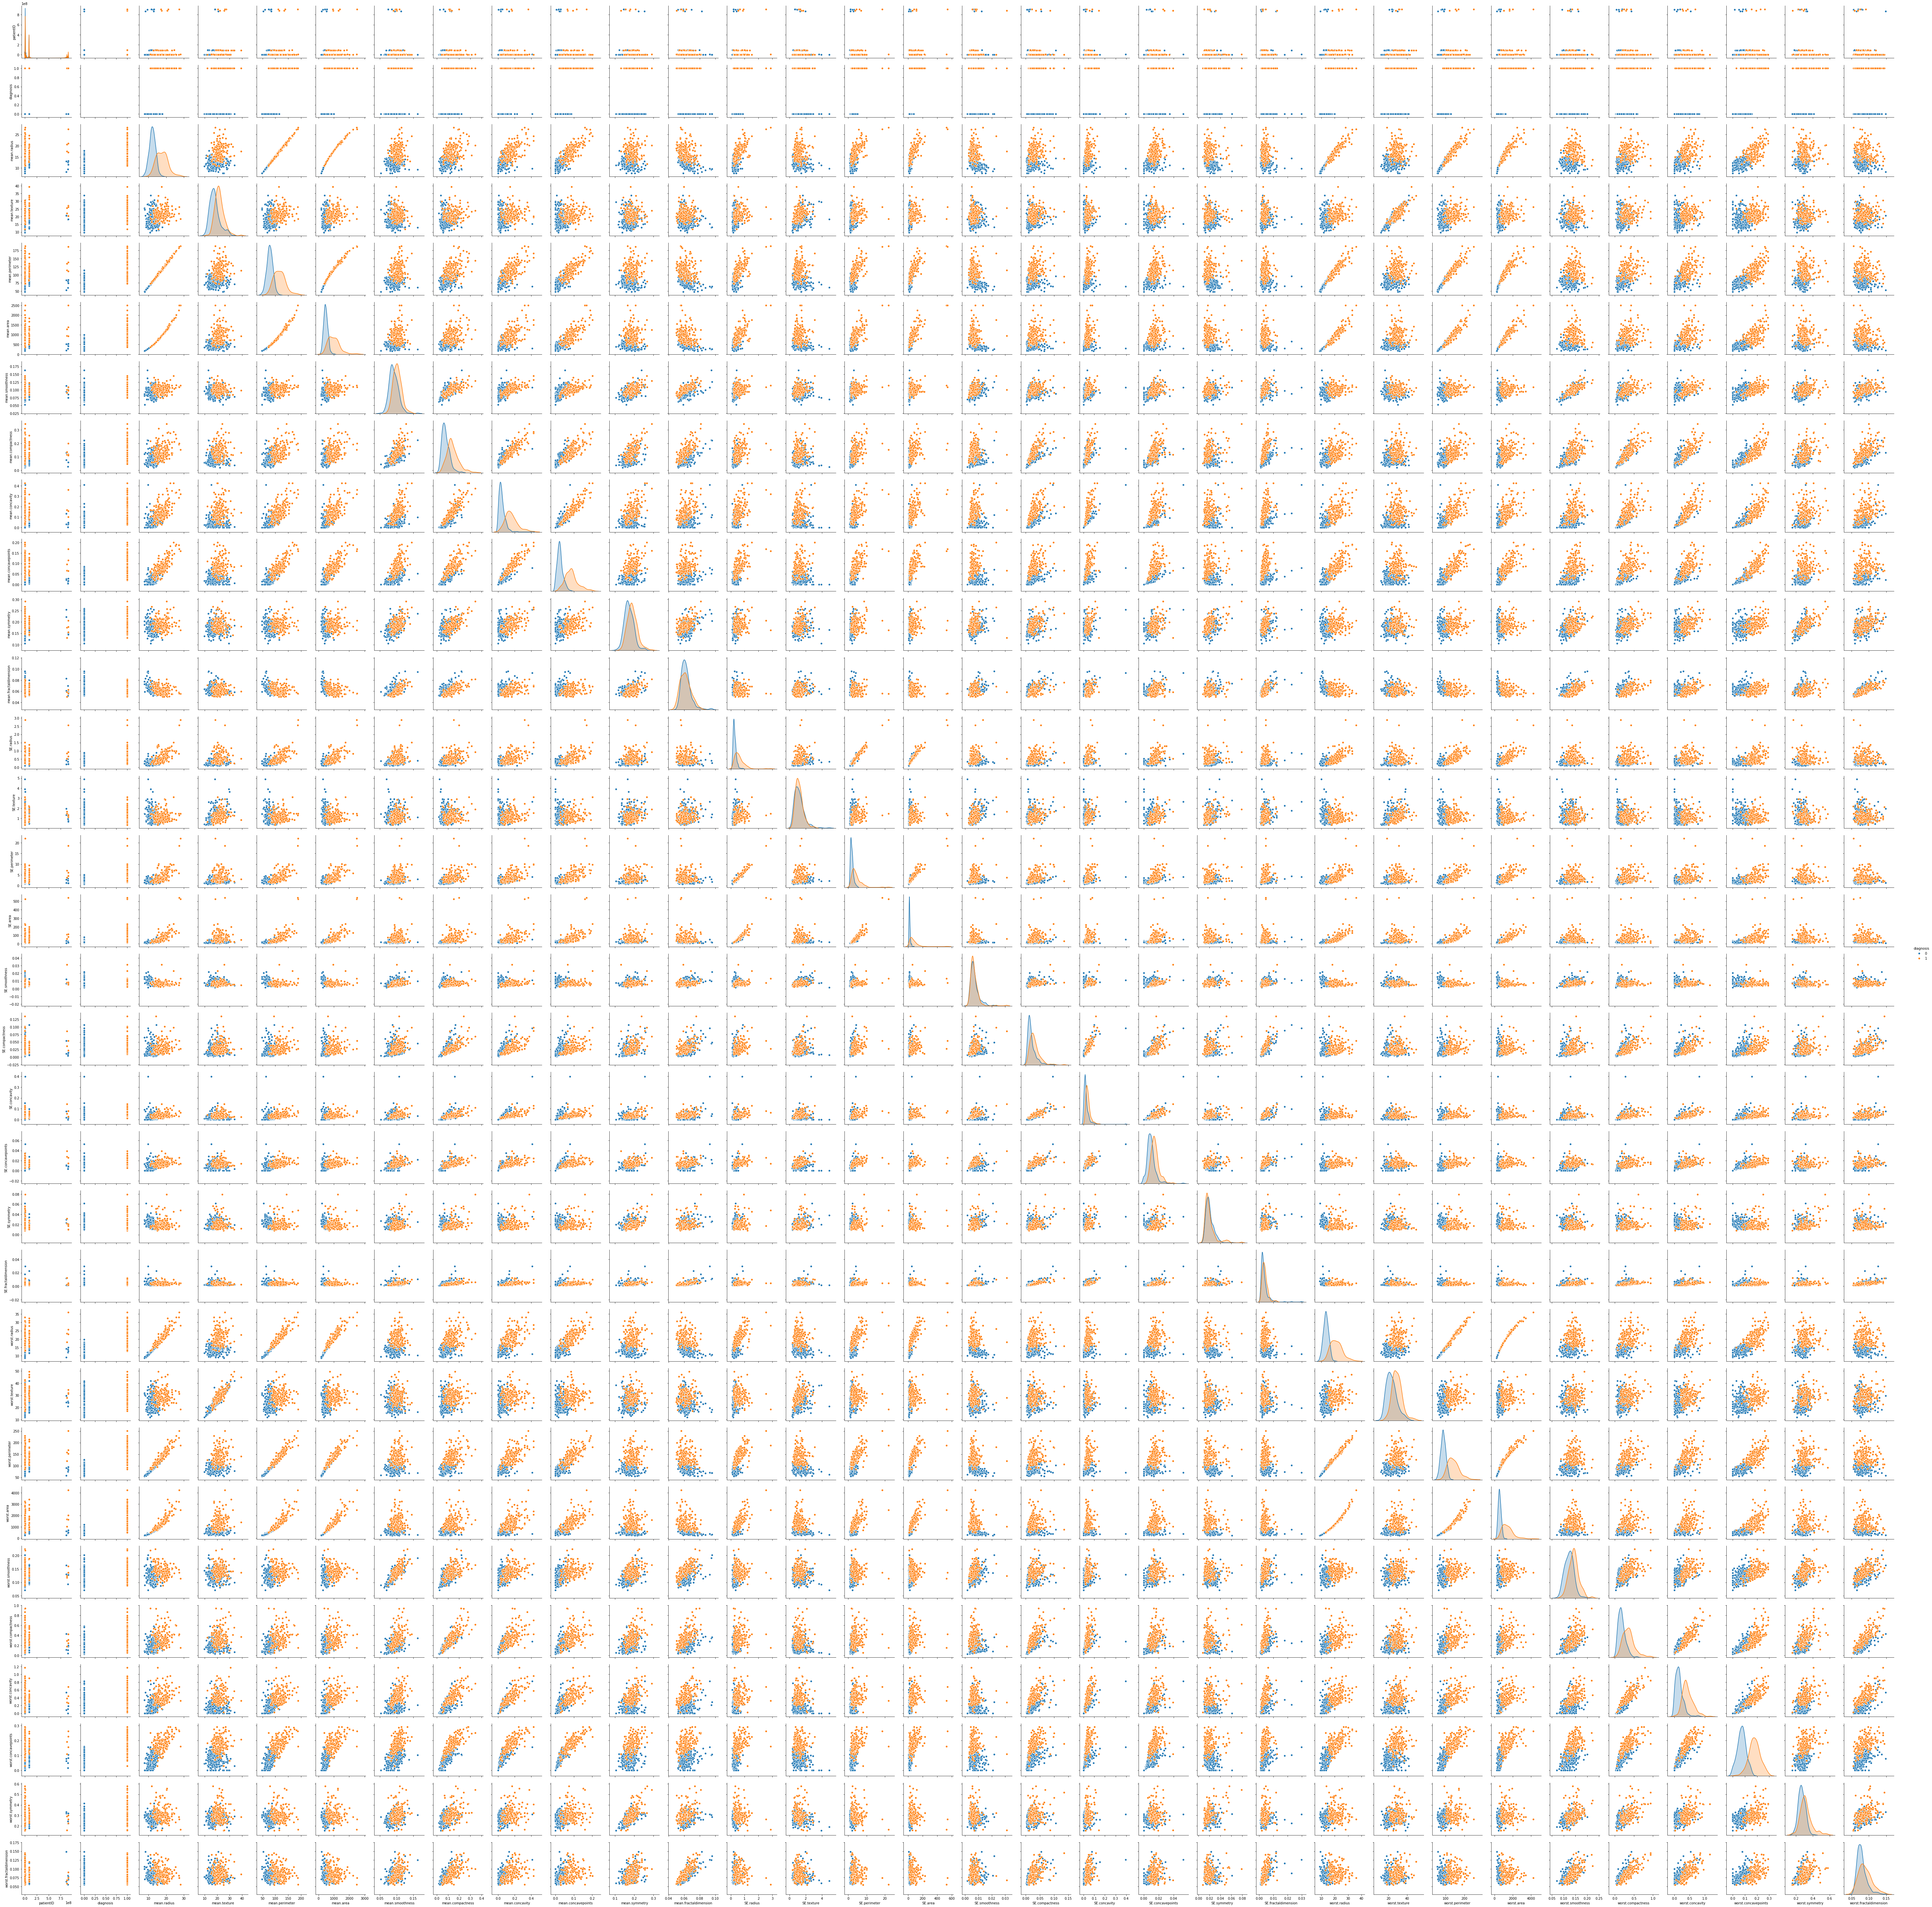

In [8]:
train_df = [malign[30:], benign[50:]]
training_df = pd.concat(train_df)
sns.pairplot(training_df, hue="diagnosis")

ii. Use logistic regression to solve the binary classification problem. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. 

In [428]:
logisticRegr = LogisticRegression() 

# Predict for x & y train
logisticRegr.fit(x_train, y_train)
y_trainPredict = logisticRegr.predict(x_train)

# Report metrics for training set
print("Training Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_trainPredict))
print("ROC AUC:", metrics.roc_auc_score(y_train, y_trainPredict))
print("Precision:", metrics.precision_score(y_train, y_trainPredict))
print("Accuracy Score:", metrics.accuracy_score(y_train, y_trainPredict))
print("Recall:", metrics.recall_score(y_train, y_trainPredict))
print("F1 Score:", metrics.f1_score(y_train, y_trainPredict))

Training Values:
Confusion Matrix:
[[299   8]
 [ 17 165]]
ROC AUC: 0.9402673873357912
Precision: 0.953757225433526
Accuracy Score: 0.9488752556237219
Recall: 0.9065934065934066
F1 Score: 0.9295774647887324


C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


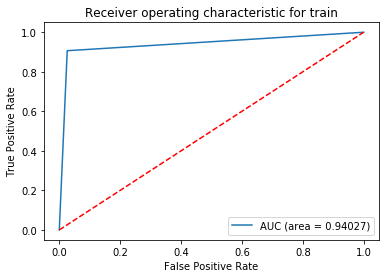

In [429]:
# Plotting ROC for training set 
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_trainPredict, pos_label=1)
logit_roc_auc = roc_auc_score(y_train, y_trainPredict)
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train')
plt.legend(loc="lower right") 

In [430]:
# Predict for x & y test 
logisticRegr.fit(x_test, y_test)
y_testPredict = logisticRegr.predict(x_test)

# Report metrics for testing set
print("Test Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_testPredict))
print("ROC AUC:", metrics.roc_auc_score(y_test, y_testPredict))
print("Precision:", metrics.precision_score(y_test, y_testPredict))
print("Accuracy Score:", metrics.accuracy_score(y_test, y_testPredict))
print("Recall:", metrics.recall_score(y_test, y_testPredict))
print("F1 Score:", metrics.f1_score(y_test, y_testPredict))

Test Values:
Confusion Matrix:
[[49  1]
 [ 0 30]]
ROC AUC: 0.99
Precision: 0.967741935483871
Accuracy Score: 0.9875
Recall: 1.0
F1 Score: 0.9836065573770492


C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


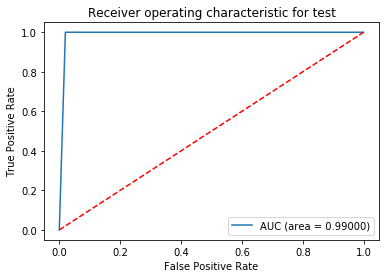

In [431]:
# Plotting ROC for testing set 
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_testPredict, pos_label=1)
logit_roc_auc1 = roc_auc_score(y_test, y_testPredict)
plt.figure()
plt.plot(fpr1, tpr1, label='AUC (area = %0.5f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test')
plt.legend(loc="lower right")
plt.show()

iii. Calculate the p-values for your logistic regression parameters and prune those variables that are not statistically significant. Refit a logistic regression model using your pruned set of features. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. 


In [432]:
# Reinstill dataframe just so M & P values get coded to 1 & 0
df.columns = ['patientID', 'diagnosis', 'mean.radius', 'mean.texture', 'mean.perimeter', 'mean.area', 'mean.smoothness', 
              'mean.compactness', 'mean.concavity', 'mean.concavepoints', 'mean.symmetry', 'mean.fractaldimension', 
              'SE.radius', 'SE.texture', 'SE.perimeter', 'SE.area', 'SE.smoothness', 
              'SE.compactness', 'SE.concavity', 'SE.concavepoints', 'SE.symmetry', 'SE.fractaldimension', 
              'worst.radius', 'worst.texture', 'worst.perimeter', 'worst.area', 'worst.smoothness', 
              'worst.compactness', 'worst.concavity', 'worst.concavepoints', 'worst.symmetry', 'worst.fractaldimension']
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0
df.head()

C:\Users\yilei\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


patientID  diagnosis  mean.radius  mean.texture  mean.perimeter  mean.area  \
0     842302          1        17.99         10.38          122.80     1001.0   
1     842517          1        20.57         17.77          132.90     1326.0   
2   84300903          1        19.69         21.25          130.00     1203.0   
3   84348301          1        11.42         20.38           77.58      386.1   
4   84358402          1        20.29         14.34          135.10     1297.0   

   mean.smoothness  mean.compactness  mean.concavity  mean.concavepoints  ...  \
0          0.11840           0.27760          0.3001             0.14710  ...   
1          0.08474           0.07864          0.0869             0.07017  ...   
2          0.10960           0.15990          0.1974             0.12790  ...   
3          0.14250           0.28390          0.2414             0.10520  ...   
4          0.10030           0.13280          0.1980             0.10430  ...   

   worst.radius  worst.texture  worst.perimeter  worst.area  worst.smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst.compactness  worst.concavity  worst.concavepoints  worst.symmetry  \
0             0.6656           0.7119               0.2654          0.4601   
1             0.1866           0.2416               0.1860          0.2750   
2             0.4245           0.4504               0.2430          0.3613   
3             0.8663           0.6869               0.2575          0.6638   
4             0.2050           0.4000               0.1625          0.2364   

   worst.fractaldimension  
0                 0.11890  
1                 0.08902  
2                 0.08758  
3                 0.17300  
4                 0.07678  

[5 rows x 32 columns]

In [433]:
# Scaling the Data 
scaler = MinMaxScaler()
newdf = scaler.fit_transform(df)
newDF = pd.DataFrame(newdf)
newDF.columns = ['patientID', 'diagnosis', 'mean.radius', 'mean.texture', 'mean.perimeter', 'mean.area', 'mean.smoothness', 
              'mean.compactness', 'mean.concavity', 'mean.concavepoints', 'mean.symmetry', 'mean.fractaldimension', 
              'SE.radius', 'SE.texture', 'SE.perimeter', 'SE.area', 'SE.smoothness', 
              'SE.compactness', 'SE.concavity', 'SE.concavepoints', 'SE.symmetry', 'SE.fractaldimension', 
              'worst.radius', 'worst.texture', 'worst.perimeter', 'worst.area', 'worst.smoothness', 
              'worst.compactness', 'worst.concavity', 'worst.concavepoints', 'worst.symmetry', 'worst.fractaldimension']
newDF.loc[newDF['diagnosis'] == 'M', 'diagnosis'] = 1
newDF.loc[newDF['diagnosis'] == 'B', 'diagnosis'] = 0
newDF.head()

C:\Users\yilei\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


patientID  diagnosis  mean.radius  mean.texture  mean.perimeter  mean.area  \
0   0.000915        1.0     0.521037      0.022658        0.545989   0.363733   
1   0.000915        1.0     0.643144      0.272574        0.615783   0.501591   
2   0.092495        1.0     0.601496      0.390260        0.595743   0.449417   
3   0.092547        1.0     0.210090      0.360839        0.233501   0.102906   
4   0.092559        1.0     0.629893      0.156578        0.630986   0.489290   

   mean.smoothness  mean.compactness  mean.concavity  mean.concavepoints  ...  \
0         0.593753          0.792037        0.703140            0.731113  ...   
1         0.289880          0.181768        0.203608            0.348757  ...   
2         0.514309          0.431017        0.462512            0.635686  ...   
3         0.811321          0.811361        0.565604            0.522863  ...   
4         0.430351          0.347893        0.463918            0.518390  ...   

   worst.radius  worst.texture  worst.perimeter  worst.area  worst.smoothness  \
0      0.620776       0.141525         0.668310    0.450698          0.601136   
1      0.606901       0.303571         0.539818    0.435214          0.347553   
2      0.556386       0.360075         0.508442    0.374508          0.483590   
3      0.248310       0.385928         0.241347    0.094008          0.915472   
4      0.519744       0.123934         0.506948    0.341575          0.437364   

   worst.compactness  worst.concavity  worst.concavepoints  worst.symmetry  \
0           0.619292         0.568610             0.912027        0.598462   
1           0.154563         0.192971             0.639175        0.233590   
2           0.385375         0.359744             0.835052        0.403706   
3           0.814012         0.548642             0.884880        1.000000   
4           0.172415         0.319489             0.558419        0.157500   

   worst.fractaldimension  
0                0.418864  
1                0.222878  
2                0.213433  
3                0.773711  
4                0.142595  

[5 rows x 32 columns]

In [434]:
# Resplit the data into train & test 
# Create x test for both malignment & benign
# Create x test for malignant 
malignp = newDF.loc[newDF['diagnosis'] == 1]
malignTestXp = malignp[:30].drop(['patientID', 'diagnosis'], axis=1) 
# Create x train for malignant
malignTrainXp = malignp[30:].drop(['patientID', 'diagnosis'] , axis=1)
# Create x test for benign (357)
benignp = newDF.loc[newDF['diagnosis'] == 0]
benignTestXp = benignp[:50].drop(['patientID', 'diagnosis'], axis=1)
# Create x train for benign
benignTrainXp = benignp[50:].drop(['patientID', 'diagnosis'], axis=1)

# Create y test for malignant
malignDiagp = malignp['diagnosis']
malignTestYp = malignDiagp[:30]
# Create y train for malignant
malignTrainYp = malignDiagp[30:]
# Create y test for benign (357)
benignDiagp = benign['diagnosis']
benignTestYp = benignDiagp[:50]
# Create y train for benign
benignTrainYp = benignDiagp[50:]

# Concatenate 
x_trainingp = [malignTrainXp, benignTrainXp]
x_trainp = pd.concat(x_trainingp)
y_trainingp = [malignTrainYp, benignTrainYp]
y_trainp = pd.concat(y_trainingp)
x_testingp = [malignTestXp, benignTestXp]
x_testp = pd.concat(x_testingp)
y_testingp = [malignTestYp, benignTestYp]
y_testp = pd.concat(y_testingp)

trainLogRegp = sm.Logit(y_trainp, x_trainp)   
trainModelp = trainLogRegp.fit(method='ncg', maxiter=1000) # method='ncg', 
print(trainModelp.summary())

         Current function value: 0.004481
         Iterations: 1000
         Function evaluations: 1020
         Gradient evaluations: 2019
         Hessian evaluations: 1000
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  489
Model:                          Logit   Df Residuals:                      459
Method:                           MLE   Df Model:                           29
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                  0.9932
Time:                        23:18:14   Log-Likelihood:                -2.1910
converged:                      False   LL-Null:                       -322.79
Covariance Type:            nonrobust   LLR p-value:                1.777e-116
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
mean.radius

C:\Users\yilei\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [410]:
# Obtain parameters with insignificant p-values  
trainModelp.pvalues[trainModelp.pvalues > 0.05]

mean.radius               0.055710
mean.texture              0.869121
mean.perimeter            0.988227
mean.area                 0.059019
mean.smoothness           0.130569
mean.concavity            0.057194
mean.fractaldimension     0.873920
SE.radius                 0.059010
SE.texture                0.182878
SE.perimeter              0.608008
SE.smoothness             0.321128
worst.radius              0.406853
worst.texture             0.121673
worst.perimeter           0.237006
worst.area                0.268080
worst.smoothness          0.073996
worst.compactness         0.123722
worst.concavity           0.113031
worst.concavepoints       0.886941
worst.fractaldimension    0.086633
dtype: float64

In [435]:
# Refit logistic regression on model with pruned dataset 
logisticRegre = LogisticRegression()
x_trainRef = x_trainp.drop(['mean.radius', 'mean.texture', 'mean.perimeter', 'mean.area', 'mean.smoothness', 
                             'mean.concavity', 'mean.fractaldimension', 'SE.radius', 
                             'SE.texture', 'SE.perimeter', 'SE.smoothness', 'worst.radius', 'worst.texture', 
                             'worst.perimeter', 'worst.area', 'worst.smoothness', 'worst.compactness', 
                             'worst.concavity', 'worst.concavepoints', 'worst.fractaldimension'], axis=1)

# Predict for x & y refitted train
logisticRegre.fit(x_trainRef, y_trainp) 
y_trainPred = logisticRegre.predict(x_trainRef)

# Report metrics for refitted training set:
print("Training Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_trainp, y_trainPred))
print("ROC AUC:", metrics.roc_auc_score(y_trainp, y_trainPred))
print("Precision:", metrics.precision_score(y_trainp, y_trainPred))
print("Accuracy Score:", metrics.accuracy_score(y_trainp, y_trainPred))
print("Recall:", metrics.recall_score(y_trainp, y_trainPred))
print("F1 Score:", metrics.f1_score(y_trainp, y_trainPred))

Training Values:
Confusion Matrix:
[[301   6]
 [ 37 145]]
ROC AUC: 0.8885796613809642
Precision: 0.9602649006622517
Accuracy Score: 0.9120654396728016
Recall: 0.7967032967032966
F1 Score: 0.8708708708708708


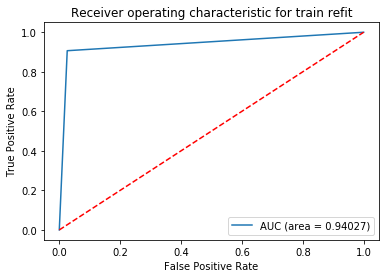

In [436]:
# Plotting ROC for refitted training set 
fpre, tpre, thresholdse = roc_curve(y_train, y_trainPredict, pos_label=1)
logit_roc_auce = roc_auc_score(y_train, y_trainPredict)
plt.figure()
plt.plot(fpre, tpre, label='AUC (area = %0.5f)' % logit_roc_auce)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train refit')
plt.legend(loc="lower right")
plt.show()

In [438]:
testLogReg = sm.Logit(y_testp, x_testp)   
testModel = testLogReg.fit(method='ncg', maxiter=1000) 
print(testModel.summary())

Optimization terminated successfully.
         Current function value: 0.000152
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 34
         Hessian evaluations: 17
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                   80
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                           29
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                  0.9998
Time:                        23:21:18   Log-Likelihood:              -0.012183
converged:                       True   LL-Null:                       -52.925
Covariance Type:            nonrobust   LLR p-value:                 1.120e-10
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [442]:
# Refit logistic regression on model with pruned dataset 
x_testRefit = x_test.drop(['mean.compactness', 'mean.concavepoints',  
                             'SE.compactness', 'SE.concavity', 'SE.concavepoints', 'SE.symmetry', 'SE.fractaldimension', 
                             'worst.symmetry'], axis=1)

In [443]:
# Predict for x & y refitted test
logisticRegre.fit(x_testRefit, y_testp) 
y_testPred = logisticRegre.predict(x_testRefit)

# Report metrics for refitted testing set
print("Testing Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_testp, y_testPred))
print("ROC AUC:", metrics.roc_auc_score(y_testp, y_testPred))
print("Precision:", metrics.precision_score(y_testp, y_testPred))
print("Accuracy Score:", metrics.accuracy_score(y_testp, y_testPred))
print("Recall:", metrics.recall_score(y_testp, y_testPred))
print("F1 Score:", metrics.f1_score(y_testp, y_testPred))

Testing Values:
Confusion Matrix:
[[49  1]
 [ 0 30]]
ROC AUC: 0.99
Precision: 0.967741935483871
Accuracy Score: 0.9875
Recall: 1.0
F1 Score: 0.9836065573770492


C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


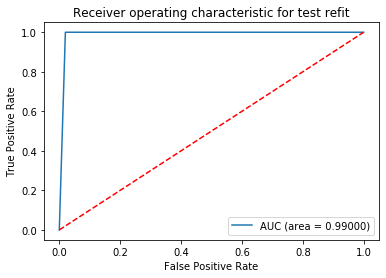

In [444]:
# Plotting ROC for refitted testing set 
fprv, tprv, thresholdse = roc_curve(y_test, y_testPredict, pos_label=1)
logit_roc_aucv = roc_auc_score(y_test, y_testPredict)
plt.figure()
plt.plot(fprv, tprv, label='AUC (area = %0.5f)' % logit_roc_aucv)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test refit')
plt.legend(loc="lower right")
plt.show()

##### 2) (a) Download the WPBC data from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). 

In [445]:
# Read in dataset
df2 = pd.read_csv("wpbc.data", header=None, engine='python')
df2.shape

(198, 35)

In [446]:
# Name data columns
df2.columns = ['patientID', 'Outcome', 'Time', 'mean.radius', 'mean.texture', 'mean.perimeter', 'mean.area', 
               'mean.smoothness', 'mean.compactness', 'mean.concavity', 'mean.concavepoints', 'mean.symmetry', 
               'mean.fractaldimension', 'SE.radius', 'SE.texture', 'SE.perimeter', 'SE.area', 'SE.smoothness', 
              'SE.compactness', 'SE.concavity', 'SE.concavepoints', 'SE.symmetry', 'SE.fractaldimension', 
              'worst.radius', 'worst.texture', 'worst.perimeter', 'worst.area', 'worst.smoothness', 
              'worst.compactness', 'worst.concavity', 'worst.concavepoints', 'worst.symmetry', 
               'worst.fractaldimension', 'diameter.tumor(cm)', 'number.lymphnodes']

(b) Select the first 130 non-recurrent cases and the first 37 recurrent cases as your training set. Add record #197 in the data set to your training set as well. 

In [447]:
# Assign binary class labels & display part of dataframe
df2.loc[df2['Outcome'] == 'N', 'Outcome'] = 0
df2.loc[df2['Outcome'] == 'R', 'Outcome'] = 1
df2.head()

patientID  Outcome  Time  mean.radius  mean.texture  mean.perimeter  \
0     119513        0    31        18.02         27.60          117.50   
1       8423        0    61        17.99         10.38          122.80   
2     842517        0   116        21.37         17.44          137.50   
3     843483        0   123        11.42         20.38           77.58   
4     843584        1    27        20.29         14.34          135.10   

   mean.area  mean.smoothness  mean.compactness  mean.concavity  ...  \
0     1013.0          0.09489            0.1036          0.1086  ...   
1     1001.0          0.11840            0.2776          0.3001  ...   
2     1373.0          0.08836            0.1189          0.1255  ...   
3      386.1          0.14250            0.2839          0.2414  ...   
4     1297.0          0.10030            0.1328          0.1980  ...   

   worst.perimeter  worst.area  worst.smoothness  worst.compactness  \
0           139.70      1436.0            0.1195             0.1926   
1           184.60      2019.0            0.1622             0.6656   
2           159.10      1949.0            0.1188             0.3449   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   worst.concavity  worst.concavepoints  worst.symmetry  \
0           0.3140               0.1170          0.2677   
1           0.7119               0.2654          0.4601   
2           0.3414               0.2032          0.4334   
3           0.6869               0.2575          0.6638   
4           0.4000               0.1625          0.2364   

   worst.fractaldimension  diameter.tumor(cm)  number.lymphnodes  
0                 0.08113                 5.0                  5  
1                 0.11890                 3.0                  2  
2                 0.09067                 2.5                  0  
3                 0.17300                 2.0                  0  
4                 0.07678                 3.5                  0  

[5 rows x 35 columns]

In [449]:
# drop column 3 of 'Time', since it will not be used for classification
df2New = df2.drop(['Time'], axis=1)
df2New.head()

patientID  Outcome  mean.radius  mean.texture  mean.perimeter  mean.area  \
0     119513        0        18.02         27.60          117.50     1013.0   
1       8423        0        17.99         10.38          122.80     1001.0   
2     842517        0        21.37         17.44          137.50     1373.0   
3     843483        0        11.42         20.38           77.58      386.1   
4     843584        1        20.29         14.34          135.10     1297.0   

   mean.smoothness  mean.compactness  mean.concavity  mean.concavepoints  ...  \
0          0.09489            0.1036          0.1086             0.07055  ...   
1          0.11840            0.2776          0.3001             0.14710  ...   
2          0.08836            0.1189          0.1255             0.08180  ...   
3          0.14250            0.2839          0.2414             0.10520  ...   
4          0.10030            0.1328          0.1980             0.10430  ...   

   worst.perimeter  worst.area  worst.smoothness  worst.compactness  \
0           139.70      1436.0            0.1195             0.1926   
1           184.60      2019.0            0.1622             0.6656   
2           159.10      1949.0            0.1188             0.3449   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   worst.concavity  worst.concavepoints  worst.symmetry  \
0           0.3140               0.1170          0.2677   
1           0.7119               0.2654          0.4601   
2           0.3414               0.2032          0.4334   
3           0.6869               0.2575          0.6638   
4           0.4000               0.1625          0.2364   

   worst.fractaldimension  diameter.tumor(cm)  number.lymphnodes  
0                 0.08113                 5.0                  5  
1                 0.11890                 3.0                  2  
2                 0.09067                 2.5                  0  
3                 0.17300                 2.0                  0  
4                 0.07678                 3.5                  0  

[5 rows x 34 columns]

In [450]:
recurrent = df2New.loc[df2New['Outcome'] == 1]
# Create x test for recurrent
recurrentTrain = recurrent[:37].append(recurrent.loc[196])
recurrentTrainX = recurrentTrain.drop(['patientID', 'Outcome'], axis=1) 
# Create x test for recurrent
recurrentTest = recurrent[37:].drop(196)
recurrentTestX = recurrentTest.drop(['patientID', 'Outcome'], axis=1) 
# Create x train for nonrecurrent 
nonrecurrent = df2New.loc[df2New['Outcome'] == 0]
nonrecurrentTrainX = nonrecurrent[:130].drop(['patientID', 'Outcome'], axis=1) 
# Create x test for nonrecurrent 
nonrecurrentTestX = nonrecurrent[130:].drop(['patientID', 'Outcome'], axis=1) 

# Create y train for recurrent
recurrentTrainY = recurrentTrain['Outcome']
# Create y test for recurrent
recurrentTestY = recurrentTest['Outcome']
# Create y train for nonrecurrent
nonrecurrentDiag = nonrecurrent['Outcome']
nonrecurrentTrainY = nonrecurrentDiag[:130] 
# Create y test for nonrecurrent
nonrecurrentTestY = nonrecurrentDiag[130:] 

# Concatenate 
x_training2 = [recurrentTrainX, nonrecurrentTrainX]
x_train2 = pd.concat(x_training2)
y_training2 = [recurrentTrainY, nonrecurrentTrainY]
y_train2 = pd.concat(y_training2)
x_testing2 = [recurrentTestX, nonrecurrentTestX]
x_test2 = pd.concat(x_testing2)
y_testing2 = [recurrentTestY, nonrecurrentTestY]
y_test2 = pd.concat(y_testing2)

(c) There are four instances in your training set that are missing the lymph node feature (denoted as ?). This is not a very severe issue, so replace the missing features with the median of the lymph node feature in your training set. 

In [451]:
x_train2trans = x_train2.loc[x_train2['number.lymphnodes'] != "?"]
medians = x_train2trans['number.lymphnodes'].median()
print("Median of 'number.lymphnodes':", medians)

Median of 'number.lymphnodes': 1.0


In [452]:
x_train2['number.lymphnodes'] = x_train2['number.lymphnodes'].replace(['?'], medians)

##### (d) Binary Classification Using Na¨ıve Bayes’ Classifiers

i. Solve the problem using a Na¨ıve Bayes’ classifier. Use Gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. 

In [453]:
Gaussian = GaussianNB()

# Predict for x & y train
Gaussian.fit(x_train2, y_train2)
y_trainPreds = Gaussian.predict(x_train2)

# Report metrics for training set
print("Training Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_train2, y_trainPreds))
print("ROC AUC:", metrics.roc_auc_score(y_train2, y_trainPreds))
print("Precision:", metrics.precision_score(y_train2, y_trainPreds))
print("Accuracy Score:", metrics.accuracy_score(y_train2, y_trainPreds))
print("Recall:", metrics.recall_score(y_train2, y_trainPreds))
print("F1 Score:", metrics.f1_score(y_train2, y_trainPreds))

Training Values:
Confusion Matrix:
[[98 32]
 [20 18]]
ROC AUC: 0.6137651821862348
Precision: 0.36
Accuracy Score: 0.6904761904761905
Recall: 0.47368421052631576
F1 Score: 0.40909090909090906


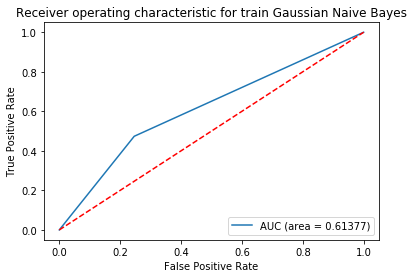

In [454]:
# Plotting ROC for training set
fpr4, tpr4, thresholds4 = roc_curve(y_train2, y_trainPreds, pos_label=1)
logit_roc_auc4 = roc_auc_score(y_train2, y_trainPreds)
plt.figure()
plt.plot(fpr4, tpr4, label='AUC (area = %0.5f)' % logit_roc_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for train Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [455]:
# Predict for x & y test
Gaussian.fit(x_test2, y_test2)
y_testPreds = Gaussian.predict(x_test2)

# Report metrics for testing set
print("Testing Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_testPreds))
print("ROC AUC:", metrics.roc_auc_score(y_test2, y_testPreds))
print("Precision:", metrics.precision_score(y_test2, y_testPreds))
print("Accuracy Score:", metrics.accuracy_score(y_test2, y_testPreds))
print("Recall:", metrics.recall_score(y_test2, y_testPreds))
print("F1 Score:", metrics.f1_score(y_test2, y_testPreds))

Testing Values:
Confusion Matrix:
[[18  3]
 [ 0  9]]
ROC AUC: 0.9285714285714286
Precision: 0.75
Accuracy Score: 0.9
Recall: 1.0
F1 Score: 0.8571428571428571


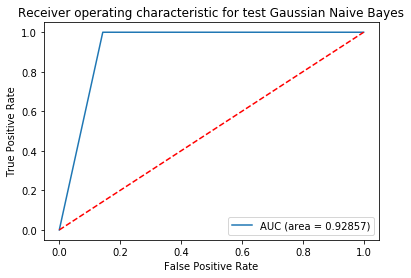

In [456]:
# Plotting ROC for training set
fpr5, tpr5, thresholds5 = roc_curve(y_test2, y_testPreds, pos_label=1)
logit_roc_auc5 = roc_auc_score(y_test2, y_testPreds)
plt.figure()
plt.plot(fpr5, tpr5, label='AUC (area = %0.5f)' % logit_roc_auc5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

ii. This data set is rather imbalanced. Balance your data set using SMOTE, by downsampling the common class in the training set to 90 instances and upsampling the uncommon class to 90 instances. Use k = 5 nearest neighbors in SMOTE. Remember not to change the balance of the test set. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. Does SMOTE help? 

In [457]:
nonrecurrentTrain = nonrecurrent[:130]
nonrecurrentTr = nonrecurrentTrain.loc[nonrecurrentTrain['number.lymphnodes'] != "?"]
medians1 = nonrecurrentTr['number.lymphnodes'].median()
nonrecurrentTrain['number.lymphnodes'] = nonrecurrentTrain['number.lymphnodes'].replace(['?'], medians1)

recurrentTrain = recurrent[:37].append(recurrent.loc[196])
recurrentTr = recurrentTrain.loc[recurrentTrain['number.lymphnodes'] != "?"]
medians2 = recurrentTr['number.lymphnodes'].median()
recurrentTrain['number.lymphnodes'] = recurrentTrain['number.lymphnodes'].replace(['?'], medians2)

C:\Users\yilei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


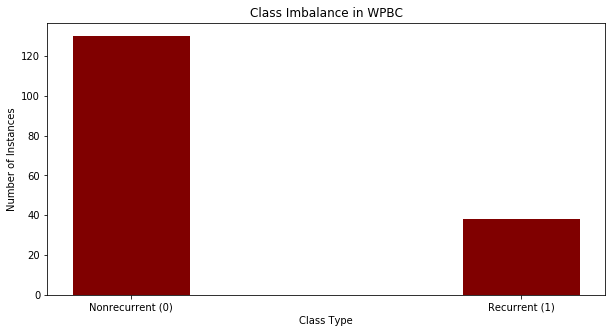

In [458]:
# To show how unbalanced the dataset is
wpbcTraining = [recurrentTrain, nonrecurrentTrain]
wpbcTrain = pd.concat(wpbcTraining)
wpbcTrainMinor = []
wpbcTrainMajor = []
for i in wpbcTrain['Outcome']: 
    if i == 0: 
        wpbcTrainMajor.append(i)
    if i == 1: 
        wpbcTrainMinor.append(i)
        
sampleCounts = [len(wpbcTrainMajor), len(wpbcTrainMinor)]
className = ['Nonrecurrent (0)', 'Recurrent (1)']
fig = plt.figure(figsize = (10, 5))
plt.bar(className, sampleCounts, color ='maroon',width = 0.3)
plt.xlabel("Class Type")
plt.ylabel("Number of Instances")
plt.title("Class Imbalance in WPBC")
plt.show()

In [459]:
# Import libraries for rebalancing 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

# Upsample uncommon class to 90 instances in training set  
nonrecurrentTrain_down = resample(nonrecurrentTrain, replace=True, n_samples=90)

# Using k=5 nearest neighbors in SMOTE 
balanceSM = SMOTE(sampling_strategy=len(nonrecurrentTrain_down), k_neighbors=5, random_state=2)

balancedTraining = [recurrentTrain, nonrecurrentTrain_down]
balancedTrain = pd.concat(balancedTraining)

# Rebalancing x & y train 
x = balancedTrain.drop(['patientID', 'Outcome'], axis=1)
y = balancedTrain['Outcome']

# Downsample common class to 90 instances in training set 
desired = {1: 90}
balanceSM = SMOTE(sampling_strategy=desired, k_neighbors=5, random_state=2)
x_refit, y_refit = balanceSM.fit_resample(x, y)

# Showing that classes are now balanced 
Counter(y_refit)

Counter({1: 90, 0: 90})

In [460]:
# Predict for x & y refit train
Gaussian.fit(x_refit, y_refit) 
balanceTrainModelpred = Gaussian.predict(x_refit)

# Report metrics for refitted training set
print("Training Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_refit, balanceTrainModelpred))
print("ROC AUC:", metrics.roc_auc_score(y_refit, balanceTrainModelpred))
print("Precision:", metrics.precision_score(y_refit, balanceTrainModelpred))
print("Accuracy Score:", metrics.accuracy_score(y_refit, balanceTrainModelpred))
print("Recall:", metrics.recall_score(y_refit, balanceTrainModelpred))
print("F1 Score:", metrics.f1_score(y_refit, balanceTrainModelpred))

Training Values:
Confusion Matrix:
[[64 26]
 [29 61]]
ROC AUC: 0.6944444444444444
Precision: 0.7011494252873564
Accuracy Score: 0.6944444444444444
Recall: 0.6777777777777778
F1 Score: 0.6892655367231639


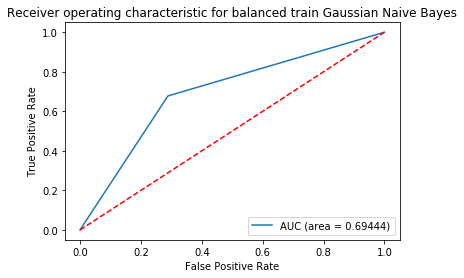

In [461]:
# Plotting ROC for refitted training set
fpr6, tpr6, thresholds6 = roc_curve(y_refit, balanceTrainModelpred, pos_label=1)
logit_roc_auc6 = roc_auc_score(y_refit, balanceTrainModelpred)
plt.figure()
plt.plot(fpr6, tpr6, label='AUC (area = %0.5f)' % logit_roc_auc6)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for balanced train Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [462]:
nonrecurrentTest = nonrecurrent[130:] # .drop(['patientID', 'Outcome'], axis=1) 
recurrentTest = recurrent[37:].drop(196)

wpbcTesting = [recurrentTest, nonrecurrentTest]
wpbcTest = pd.concat(wpbcTesting)

x_testfit = wpbcTest.drop(['patientID', 'Outcome'], axis=1)
y_testfit = wpbcTest['Outcome']

# Predict for x & y test
Gaussian.fit(x_testfit, y_testfit)
y_testPredi = Gaussian.predict(x_testfit)

# Report metrics for testing set
print("Testing Values:")
print("Confusion Matrix:")
print(confusion_matrix(y_testfit, y_testPredi))
print("ROC AUC:", metrics.roc_auc_score(y_testfit, y_testPredi))
print("Precision:", metrics.precision_score(y_testfit, y_testPredi))
print("Accuracy Score:", metrics.accuracy_score(y_testfit, y_testPredi))
print("Recall:", metrics.recall_score(y_testfit, y_testPredi))
print("F1 Score:", metrics.f1_score(y_testfit, y_testPredi))

Testing Values:
Confusion Matrix:
[[18  3]
 [ 0  9]]
ROC AUC: 0.9285714285714286
Precision: 0.75
Accuracy Score: 0.9
Recall: 1.0
F1 Score: 0.8571428571428571


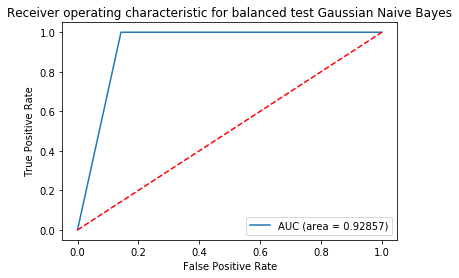

In [463]:
# Plotting ROC for testing set
fpr7, tpr7, thresholds7 = roc_curve(y_testfit, y_testPredi, pos_label=1)
logit_roc_auc7 = roc_auc_score(y_testfit, y_testPredi)
plt.figure()
plt.plot(fpr7, tpr7, label='AUC (area = %0.5f)' % logit_roc_auc7)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for balanced test Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

SMOTE helps because SMOTE improved the performance on the training data, since the training data here managed to obtain a slightly higher ROC AUC compared to that in 2ci, where the Gaussian NB was directly performed on the data. 